## Import

In [12]:
import pathlib
import IPython.display as display
import scipy.io as sio 
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 
import random
import os
import tensorflow as tf
tf.__version__

'1.9.0'

## PREP

In [2]:
trainX = "dataset/trimodel/Scene 1/SyncRGB"
trainY = "dataset/trimodel/Scene 1/rgbMasks"

data_root_RGB = pathlib.Path(trainX)
all_image_paths_RGB = list(data_root_RGB.glob('*.jpg'))
all_image_paths_RGB = [str(path) for path in all_image_paths_RGB]
#random.shuffle(all_image_pathsY)

data_root_Depth = pathlib.Path(trainY)
all_image_paths_Depth = list(data_root_Depth.glob('*.png'))
all_image_paths_Depth = [str(path) for path in all_image_paths_Depth]

#keep only Depth  (Depth inner join )
image_count = len(all_image_paths_Depth)
namesY = [os.path.basename(x) for x in all_image_paths_Depth]
c = [ os.path.splitext(os.path.basename(x))[0] for x in namesY]

all_image_paths_RGB = [ s for s in all_image_paths_RGB for xs in c if xs in s]
if len(all_image_paths_RGB)==len(all_image_paths_Depth) : print("PASS: number   are equal")
else:     
    print("File not equal")
    raise
    
# get all_image_paths_RGB = X,all_image_paths_Depth =Y

PASS: number   are equal


## Random sample

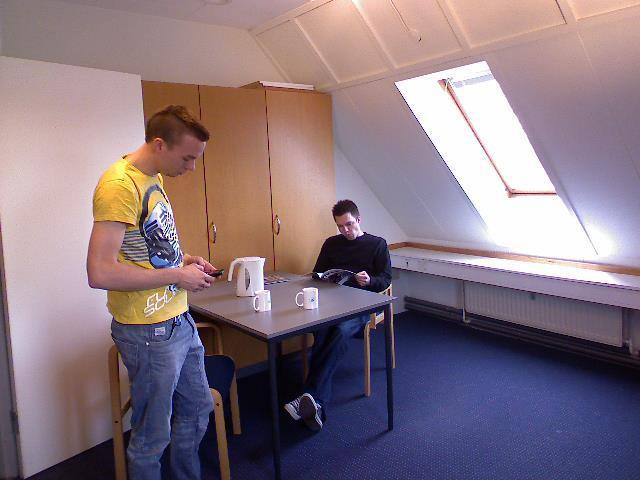

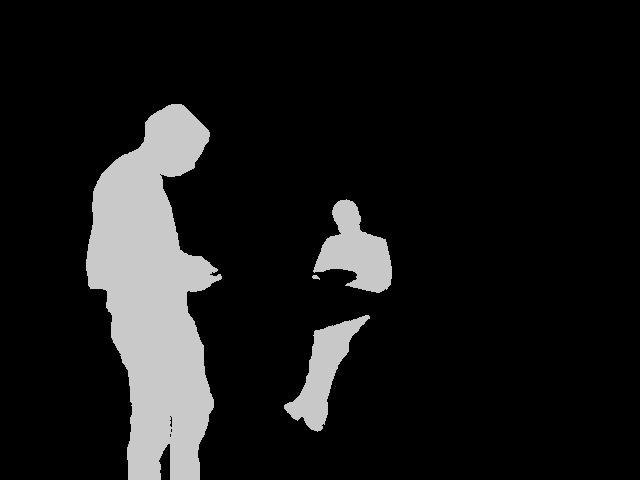

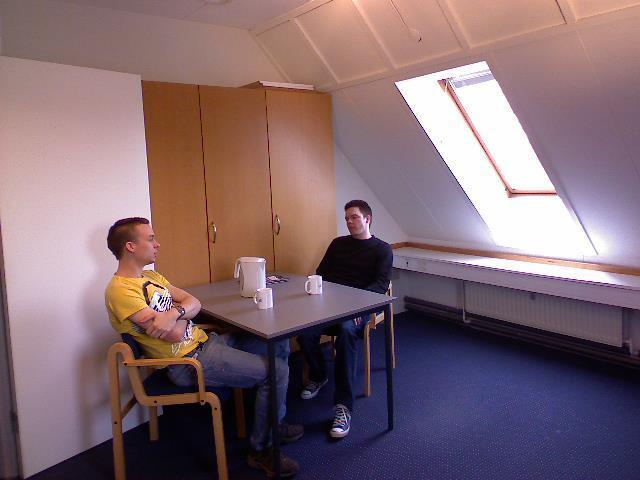

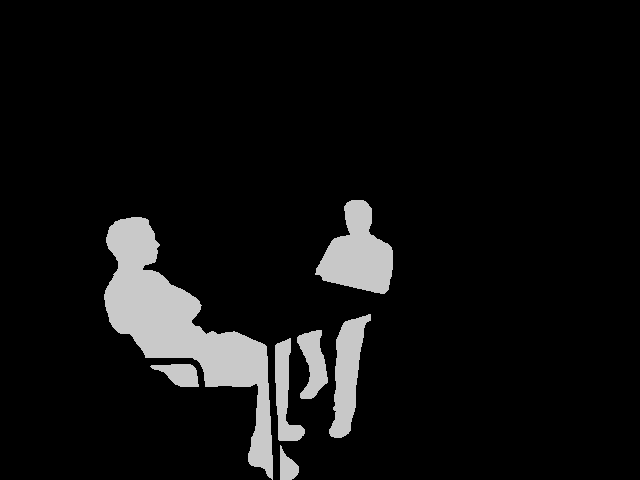

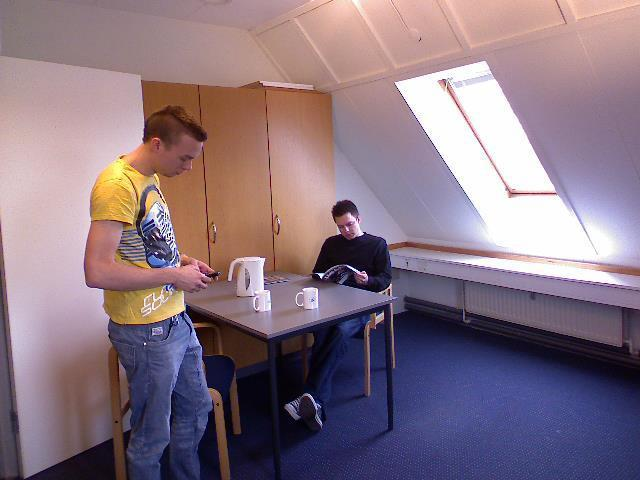

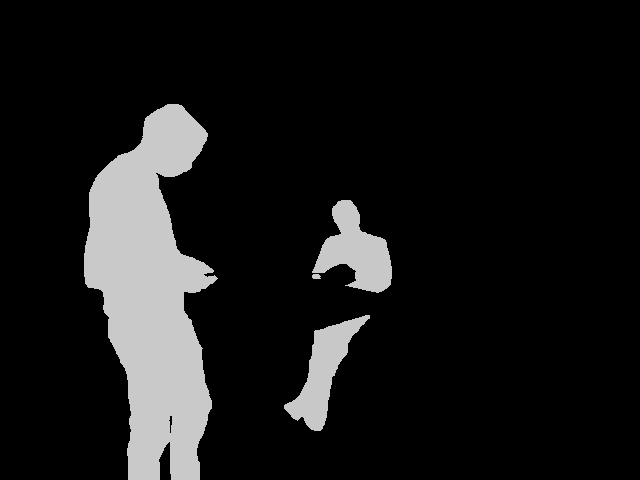

In [9]:
for n in range(3):
  image_path = random.choice(all_image_paths_RGB)
  display.display(display.Image(image_path))
  display.display(display.Image( image_path.replace("\\SyncRGB\\", "\\rgbMasks\\").replace(".jpg",".png")))
  print()

In [10]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize_images(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image
def load_and_preprocess_image(path):
  image = tf.read_file(path)
  return preprocess_image(image)

## Load to tensorshape

In [33]:
image_paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths_RGB)
label_paths_ds = tf.data.Dataset.from_tensor_slices(all_image_paths_Depth)
image_ds = image_paths_ds.map(load_and_preprocess_image, num_parallel_calls=5)
label_ds = label_paths_ds.map(load_and_preprocess_image, num_parallel_calls=5)

In [34]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [35]:
image_label_ds

<ZipDataset shapes: ((192, 192, 3), (192, 192, 3)), types: (tf.float32, tf.float32)>